# STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS

#### importing machine learning libraries

In [188]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import os

#### importing library to fetch data from twitter

In [189]:
# load tweets into a dataframe
df18 = pd.read_json(os.path.join('condensed_2018.json'))
df17 = pd.read_json(os.path.join('condensed_2017.json'))
read_stock_p = pd.read_csv(os.path.join('dow.csv'))
frames = [df18, df17]

result = pd.concat(frames)
# Reset index
result = result.reset_index(drop=True)

result

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [190]:
# drop retweets
result = result[~result.text.str.startswith('RT')]

In [191]:

result = result.reset_index(drop=True)

In [192]:
result = result.rename(columns={"text": "Tweets"})

In [193]:
result

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,Tweets
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t..."
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f..."
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can..."
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...


In [194]:
df = result['created_at'].apply(lambda x: x.date)
df.head()

0    <built-in method date of Timestamp object at 0...
1    <built-in method date of Timestamp object at 0...
2    <built-in method date of Timestamp object at 0...
3    <built-in method date of Timestamp object at 0...
4    <built-in method date of Timestamp object at 0...
Name: created_at, dtype: object

In [195]:
result["Date"] = df

In [196]:
result

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,Tweets,Date
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,<built-in method date of Timestamp object at 0...
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",<built-in method date of Timestamp object at 0...
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,<built-in method date of Timestamp object at 0...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,<built-in method date of Timestamp object at 0...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",<built-in method date of Timestamp object at 0...
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",<built-in method date of Timestamp object at 0...
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...,<built-in method date of Timestamp object at 0...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can...",<built-in method date of Timestamp object at 0...
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...,<built-in method date of Timestamp object at 0...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...,<built-in method date of Timestamp object at 0...


In [138]:
import re
result['Tweets'] = result['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [139]:
result

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,Tweets,Date
0,2018-12-31 23:53:06,136012,1079888205351145472,NaN,False,33548,Twitter for iPhone,HAPPY NEW YEAR!,<built-in method date of Timestamp object at 0...
1,2018-12-31 20:02:52,65069,1079830268708556800,25073877.0,False,17456,Twitter for iPhone,"....Senator Schumer, more than a year longer t...",<built-in method date of Timestamp object at 0...
2,2018-12-31 20:02:52,76721,1079830267274108928,NaN,False,21030,Twitter for iPhone,Heads of countries are calling wanting to know...,<built-in method date of Timestamp object at 0...
3,2018-12-31 15:39:15,127485,1079763923845419008,NaN,False,29610,Twitter for iPhone,It’s incredible how Democrats can all use thei...,<built-in method date of Timestamp object at 0...
4,2018-12-31 15:37:14,132439,1079763419908243456,NaN,False,30957,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",<built-in method date of Timestamp object at 0...
5,2018-12-31 15:33:15,4217,1079762413589807104,NaN,False,1123,Twitter for iPhone,"I’m in the Oval Office. Democrats, come back f...",<built-in method date of Timestamp object at 0...
6,2018-12-31 14:38:52,112735,1079748730058870784,NaN,False,25463,Twitter for iPhone,I am the only person in America who could say ...,<built-in method date of Timestamp object at 0...
7,2018-12-31 13:29:32,91523,1079731279032172544,NaN,False,22079,Twitter for iPhone,"I campaigned on Border Security, which you can...",<built-in method date of Timestamp object at 0...
8,2018-12-31 13:19:13,72758,1079728684427341824,NaN,False,15152,Twitter for iPhone,.....Except the results are FAR BETTER than I ...,<built-in method date of Timestamp object at 0...
9,2018-12-31 13:12:40,101470,1079727034673311744,NaN,False,22119,Twitter for iPhone,...I campaigned on getting out of Syria and ot...,<built-in method date of Timestamp object at 0...


In [140]:

data = result.filter(['Date', 'Tweets'])


#### Removing special character from each tweets

In [141]:
# data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
#print(cdata.dtypes)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [142]:
cdata

,Date,Tweets
0,<built-in method date of Timestamp object at 0...,HAPPY NEW YEAR
1,<built-in method date of Timestamp object at 0...,Senator Schumer more than a year longer than a...
2,<built-in method date of Timestamp object at 0...,Heads of countries are calling wanting to know...
3,<built-in method date of Timestamp object at 0...,Its incredible how Democrats can all use their...
4,<built-in method date of Timestamp object at 0...,Im in the Oval Office Democrats come back from...
5,<built-in method date of Timestamp object at 0...,Im in the Oval Office Democrats come back from...
6,<built-in method date of Timestamp object at 0...,I am the only person in America who could say ...
7,<built-in method date of Timestamp object at 0...,I campaigned on Border Security which you cann...
8,<built-in method date of Timestamp object at 0...,Except the results are FAR BETTER than I ever ...
9,<built-in method date of Timestamp object at 0...,I campaigned on getting out of Syria and other...


#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

#### Creating a dataframe where we will combine the tweets date wise and store into

In [143]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [16]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


#### All the tweets has been clubbed as per their date.

In [17]:
ccdata

,Date,Tweets
0,<built-in method date of Timestamp object at 0...,
1,<built-in method date of Timestamp object at 0...,
2,<built-in method date of Timestamp object at 0...,
3,<built-in method date of Timestamp object at 0...,
4,<built-in method date of Timestamp object at 0...,
5,<built-in method date of Timestamp object at 0...,
6,<built-in method date of Timestamp object at 0...,
7,<built-in method date of Timestamp object at 0...,
8,<built-in method date of Timestamp object at 0...,
9,<built-in method date of Timestamp object at 0...,


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [18]:

read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,19872.859375,19938.529297,19775.929688,19881.759766,19881.759766,339180000
1,2017-01-04,19890.939453,19956.140625,19878.830078,19942.160156,19942.160156,280010000
2,2017-01-05,19924.560547,19948.599609,19811.119141,19899.289063,19899.289063,269920000
3,2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
4,2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287510000
5,2017-01-10,19876.349609,19957.119141,19836.029297,19855.529297,19855.529297,299410000
6,2017-01-11,19887.380859,19973.419922,19833.160156,19954.279297,19954.279297,336150000
7,2017-01-12,19926.210938,19929.289063,19770.470703,19891.000000,19891.000000,306290000
8,2017-01-13,19912.539063,19952.029297,19849.380859,19885.730469,19885.730469,263780000
9,2017-01-17,19848.820313,19882.990234,19775.349609,19826.769531,19826.769531,341900000


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [19]:
ccdata['Prices']=""

In [20]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [21]:
ccdata

,Date,Tweets,Prices
0,<built-in method date of Timestamp object at 0...,,
1,<built-in method date of Timestamp object at 0...,,
2,<built-in method date of Timestamp object at 0...,,
3,<built-in method date of Timestamp object at 0...,,
4,<built-in method date of Timestamp object at 0...,,
5,<built-in method date of Timestamp object at 0...,,
6,<built-in method date of Timestamp object at 0...,,
7,<built-in method date of Timestamp object at 0...,,
8,<built-in method date of Timestamp object at 0...,,
9,<built-in method date of Timestamp object at 0...,,


#### So we take the mean for the close price and put it in the blank value

In [213]:
# mean=0
# summ=0
# count=0
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]!=""):
#         summ=summ+int(ccdata.Prices.iloc[i])
#         count=count+1
# mean=summ/count
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]==""):
#         ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [214]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381,-0.9391,0.139,0.745,0.116
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381,0.9835,0.090,0.644,0.266
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381,0.3644,0.105,0.786,0.110
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062,-0.3262,0.089,0.829,0.082
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138,-0.9813,0.133,0.779,0.088
5,2018-12-26,,22878,0.0000,0.000,0.000,0.000
6,2018-12-25,I hope everyone even the Fake News Media is h...,23381,0.9511,0.053,0.602,0.345
7,2018-12-24,I am in the Oval Office amp just gave out a 1...,21792,0.9940,0.077,0.774,0.149
8,2018-12-23,Thanks RandPaul I am very proud of the Presi...,23381,0.9530,0.125,0.717,0.158
9,2018-12-22,I will not be going to Florida because of the...,23381,0.8010,0.133,0.712,0.156


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [215]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [216]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381,,,,
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381,,,,
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381,,,,
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062,,,,
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138,,,,
5,2018-12-26,,22878,,,,
6,2018-12-25,I hope everyone even the Fake News Media is h...,23381,,,,
7,2018-12-24,I am in the Oval Office amp just gave out a 1...,21792,,,,
8,2018-12-23,Thanks RandPaul I am very proud of the Presi...,23381,,,,
9,2018-12-22,I will not be going to Florida because of the...,23381,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [217]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\taiwo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [218]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [219]:

ccdata = pd.read_csv(os.path.join('ccdata.csv'))

#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  69.76090014064698
% of negative tweets=  24.613220815752463


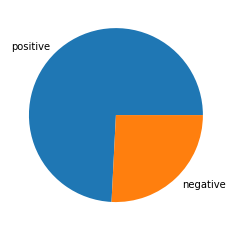

In [220]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()
mlpt.savefig("pie.png")

#### Making a new dataframe with necessary columns for providing machine learning.

In [164]:
df_=ccdata[['Date','Tweets','Prices','Comp','Negative','Neutral','Positive']].copy()

In [165]:
df_.head()

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2018-12-31,HAPPY NEW YEAR Senator Schumer more than a ye...,23381,-0.9391,0.139,0.745,0.116
1,2018-12-30,President and Mrs Obama builthas a ten foot W...,23381,0.9835,0.090,0.644,0.266
2,2018-12-29,2018 is being called THE YEAR OF THE WORKER b...,23381,0.3644,0.105,0.786,0.110
3,2018-12-28,Thank you to Sean Parnell for the nice commen...,23062,-0.3262,0.089,0.829,0.082
4,2018-12-27,CNN amp others within the Fake News Universe ...,23138,-0.9813,0.133,0.779,0.088


#### Dividing the dataset into train and test.

In [166]:
train_start_index = '0'
train_end_index = '142'
test_start_index = '143'
test_end_index = '710'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [167]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [168]:
print(numpy_df_train)

[[0.139 0.116]
 [0.09  0.266]
 [0.105 0.11 ]
 [0.089 0.082]
 [0.133 0.088]
 [0.    0.   ]
 [0.053 0.345]
 [0.077 0.149]
 [0.125 0.158]
 [0.133 0.156]
 [0.097 0.169]
 [0.113 0.15 ]
 [0.112 0.176]
 [0.138 0.172]
 [0.011 0.233]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [169]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [170]:
print(numpy_df_test)

[[0.172 0.078]
 [0.133 0.164]
 [0.037 0.22 ]
 ...
 [0.145 0.075]
 [0.114 0.142]
 [0.207 0.132]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [171]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

    Prices
0    23381
1    23381
2    23381
3    23062
4    23138
5    22878
6    23381
7    21792
8    23381
9    23381
10   22445
11   22859
12   23323
13   23675
14   23592


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [172]:
pip install treeinterpreter


Note: you may need to restart the kernel to use updated packages.


In [173]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Making Predictions

In [174]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [175]:
print(prediction)

[[23139.5]
 [23240.3]
 [23489. ]
 [23328.8]
 [22842.6]
 [23449.3]
 [23139.5]
 [23139.5]
 [22706.3]
 [23235.2]
 [22906.6]
 [22999.4]
 [23489. ]
 [22745.4]
 [22838.1]
 [23507.6]
 [23449.3]
 [22495.2]
 [23494.8]
 [23154.7]
 [22967.5]
 [23451.8]
 [23139.5]
 [23545.8]
 [23283.8]
 [23263.9]
 [22838.1]
 [23043.1]
 [22999.4]
 [23497.3]
 [23486.5]
 [23440.2]
 [23494.8]
 [23021.6]
 [23440.2]
 [23375.2]
 [23283.8]
 [23440.2]
 [23519.7]
 [22841.9]
 [23452.6]
 [22057.6]
 [23537. ]
 [23457.6]
 [23566.4]
 [23349.9]
 [23358.2]
 [23402.1]
 [23481.2]
 [23440.2]
 [23311.1]
 [23449.3]
 [23011. ]
 [23444.3]
 [23449.3]
 [23203.3]
 [22854.4]
 [23455.1]
 [22850.2]
 [22758.5]
 [23449.3]
 [23038.9]
 [23134. ]
 [23431.5]
 [23402.1]
 [23558.1]
 [23494.8]
 [22164.3]
 [23441. ]
 [23451.8]
 [23011. ]
 [23566.4]
 [23311.1]
 [23494.8]
 [23431.5]
 [23381. ]
 [22999.4]
 [23441. ]
 [23581. ]
 [22838.1]
 [23358.2]
 [23494.8]
 [23486.5]
 [23558.1]
 [23381. ]
 [23011. ]
 [22745.4]
 [22057.6]
 [23358.2]
 [22854.4]
 [23283.8]

#### Importing matplotlib library for plotting graph

In [176]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [180]:
len(idx)

569

In [182]:
idx=np.arange(int(test_start_index),int(test_end_index)+2)
predictions_df_ = pd.DataFrame(data=prediction[0:], columns=['Prices'])

In [197]:
predictions_df_.head()

,Prices
0,23139.5
1,23240.3
2,23489.0
3,23328.8
4,22842.6


#### Plotting the graph for the Predicted_price VS Actual Price

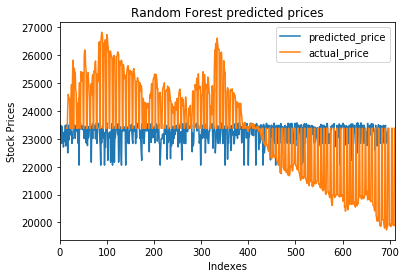

In [198]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [199]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
reg.predict(numpy_df_test)

array([[23163.93967926],
       [23226.69071758],
       [23121.44501874],
       [23128.52510372],
       [22813.01307638],
       [23118.47022492],
       [23155.13490774],
       [23128.82348302],
       [23118.95766386],
       [23210.13579236],
       [23133.59241309],
       [23013.31712569],
       [23131.791847  ],
       [23009.24141426],
       [22677.89726006],
       [23169.94585692],
       [23147.16611467],
       [23112.4974874 ],
       [23135.6553489 ],
       [23113.59840502],
       [22985.0225051 ],
       [23182.15627115],
       [23238.58603243],
       [23477.06081173],
       [23150.35954784],
       [23298.78026617],
       [22677.89726006],
       [23040.54040839],
       [23014.85918244],
       [23114.18230396],
       [23252.48512362],
       [23197.04309987],
       [23142.26471502],
       [23006.79392935],
       [23234.81899054],
       [23437.22584565],
       [23232.73290482],
       [23226.54152793],
       [23382.56321031],
       [23092.24496999],
